# Week 4 - Vehicle Insurance EDA 

This data set is found from this [kaggle](https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction). The dataset is provided by a health insurance company that is looking to evaluate the probability of their current health insurance customers to also buy car insurance based on numerous features.

## Data Defintions
|Variable |	Definition|
|----------|-----------|
id |	Unique ID for the customer|
Gender |Gender of the customer
Age |	Age of the customer
Driving_License |	0 : Customer does not have DL, 1 : Customer already has DL
Region_Code |	Unique code for the region of the customer
Previously_Insured |	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
Vehicle_Age |	Age of the Vehicle
Vehicle_Damage |	1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
Annual_Premium |	The amount customer needs to pay as premium in the year
Policy_Sales_Channel |	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
Vintage |	Number of Days, Customer has been associated with the company
Response |	1 : Customer is interested, 0 : Customer is not interested

In [1]:
# Setting up fastai
import fastbook
fastbook.setup_book()

In [33]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Model Libraries
from fastai.tabular.all import *
from fastbook import *
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# EDA Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path = Path('C:/Users/saketm1/Desktop/ML_Projects/Week_4_insurance/archive')

In [4]:
# Setting up the dataframes
test_df = pd.read_csv(path/'test.csv')
train_df = pd.read_csv(path/'train.csv')

In [47]:
test_df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [48]:
train_df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [49]:
train_df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [50]:
test_df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
dtype: object

All the variables are in the correct data type now time to learn more about the data and its spread/makeup. The difference at a high level between the train_df and test_df is that the test_df does not have response column. We will look into train dataframe just to generally understand what our potential customers look like.

## EDA 

In [86]:
train_df.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


See some potential anomaly data so going to look at those specific datasets.

In [88]:
train_df.loc[train_df['Annual_Premium'].idxmax()] 

Gender                      Male
Age                           26
Driving_License                1
Region_Code                 28.0
Previously_Insured             0
Vehicle_Age             < 1 Year
Vehicle_Damage               Yes
Annual_Premium          540165.0
Policy_Sales_Channel       156.0
Vintage                      245
Response                       1
Name: 54743, dtype: object

An individual paying over 500k in Annual Premium seems kind of outrageous, however it is a new car and the individual was not previously insured so it is not completely out of the question for this to be a legit data point. Instead of simply removing it, since there is a small chance this is a legit datapoint and has semi-minimal afect on a 30k dataset, we will keep it.

In [89]:
train_df.loc[train_df['Annual_Premium'].idxmin()] 

Gender                    Female
Age                           24
Driving_License                1
Region_Code                 33.0
Previously_Insured             0
Vehicle_Age             < 1 Year
Vehicle_Damage               Yes
Annual_Premium            2630.0
Policy_Sales_Channel       160.0
Vintage                      176
Response                       0
Name: 5, dtype: object

With so many individuals paying in the 10s of thousands, it seems a little out of place for someone to be paying so little on their annual premium to be so low. It seems to be a very similar situation as the datapoint above, not previously insured, new car, similar age, yet their premium is so much significantly lower. This raises more questions about the data points above, so I would go to the customer and follow-up on these individuals whether theres some sort of error and how the data was collected

In [24]:
train_df[train_df['Driving_License'] == 0].head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
563,564,Male,69,0,33.0,0,1-2 Year,Yes,39730.0,26.0,53,0
1061,1062,Male,71,0,3.0,0,1-2 Year,No,25323.0,26.0,179,0
1761,1762,Female,58,0,28.0,0,1-2 Year,Yes,53047.0,122.0,214,0
1990,1991,Male,66,0,8.0,0,1-2 Year,No,48063.0,25.0,231,0
2365,2366,Female,52,0,45.0,1,1-2 Year,No,33283.0,26.0,152,0
2698,2699,Male,67,0,1.0,1,1-2 Year,No,2630.0,26.0,35,0
2943,2944,Male,67,0,8.0,0,1-2 Year,Yes,45024.0,7.0,124,0
2957,2958,Male,72,0,28.0,0,1-2 Year,Yes,72033.0,26.0,253,0
3142,3143,Male,61,0,41.0,0,1-2 Year,Yes,40121.0,26.0,21,0
3182,3183,Male,78,0,48.0,1,1-2 Year,Yes,2630.0,124.0,157,0


In [6]:
train_df.loc[train_df['Driving_License'] == 0].describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,812.000000,812.000000,812.0,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,191896.698276,65.604680,0.0,26.698276,0.296798,34999.727833,60.736453,155.883005,0.050493
std,109366.149515,10.479509,0.0,12.087692,0.457128,18510.698918,48.791077,82.896574,0.219094
min,564.000000,21.000000,0.0,0.000000,0.000000,2630.000000,3.000000,10.000000,0.000000
25%,105484.250000,59.750000,0.0,21.750000,0.000000,27091.500000,26.000000,83.750000,0.000000
50%,193245.000000,67.000000,0.0,28.000000,0.000000,35767.500000,26.000000,156.000000,0.000000
75%,285495.750000,74.000000,0.0,29.000000,1.000000,46024.250000,124.000000,231.250000,0.000000
max,380918.000000,85.000000,0.0,50.000000,1.000000,111683.000000,163.000000,298.000000,1.000000


Looking at these individuals without a license plate as a baseline factor to understand annual premium and how large of a gap there is in the payment, region, and vintage age. It suggests that the significantly lower annual premiums are more of an anomaly than previously assumed.

In [91]:
train_df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Now that the precursory data checking is done, time to actually deep dive into the data and see what stories it tells.

<AxesSubplot:xlabel='Response', ylabel='count'>

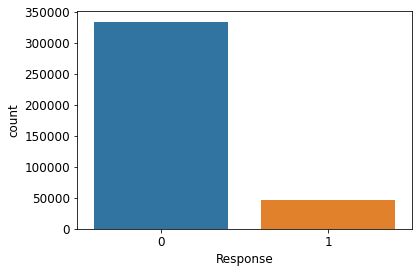

In [95]:
sns.countplot(train_df.Response)

Data is clearly biased towards not buying the insurance. We have to look into what factors can we identify will push those few customers to a yes.

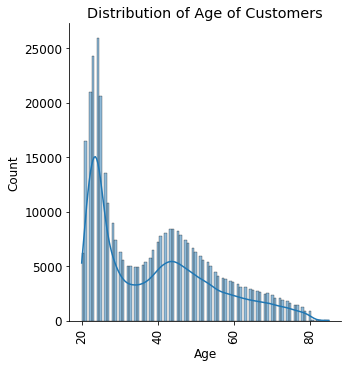

In [99]:
sns.displot(x='Age', data=train_df, kde=True)
plt.xticks(rotation=90)
plt.title('Distribution of Age of Customers')
plt.show()

<AxesSubplot:ylabel='Annual_Premium'>

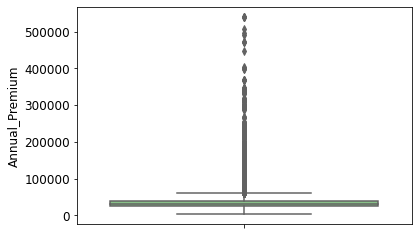

In [100]:
sns.boxplot(y = 'Annual_Premium', data = train_df,palette='Accent')

Looking at the distribution for Annual Premium, we see that it is majority under 100k, while a still significant amount of daata points above the 100k mark which suggests that there is not some negligence in these prices.

C:\Users\saketm1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

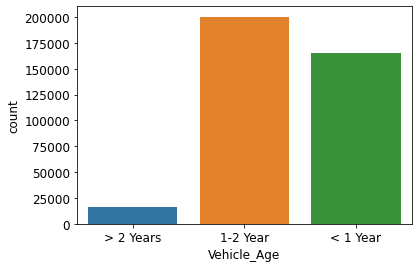

In [121]:
sns.countplot(train_df.Vehicle_Age)

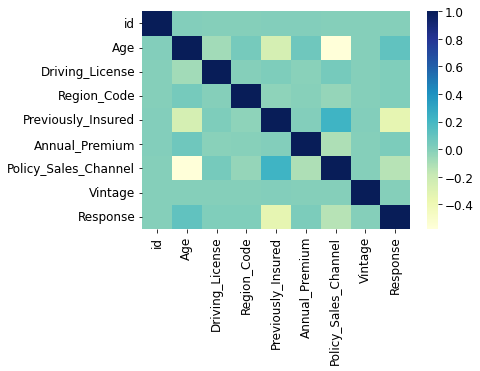

In [7]:
dataplot = sns.heatmap(train_df.corr(), cmap = "YlGnBu")

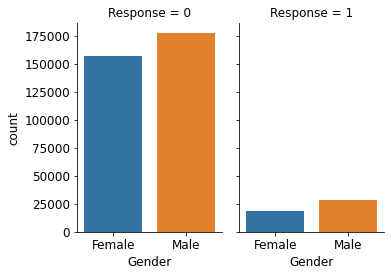

In [120]:
age_gender_df = train_df.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
g = sns.catplot(x="Gender", y='count',col="Response",
               data=age_gender_df, kind="bar",
               height=4, aspect=.7);

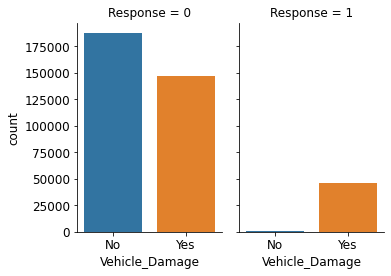

In [126]:
dmg_df = train_df.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
g = sns.catplot(x="Vehicle_Damage", y="count",col="Response",
                data=dmg_df, kind="bar",
                height=4, aspect=.7);

Looks like they offer extremely bad rates to individuals with no vehicle damage and this would be one of the first talking points to consult.

In [13]:
area_df = train_df.groupby('Region_Code')['Annual_Premium'].agg(Mean='mean',Count='count')
area_df

Index(['Mean', 'Count'], dtype='object')

Text(0.5, 1.0, 'Area Average Premium')

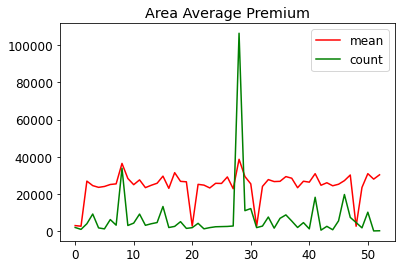

In [22]:
x = area_df.index
y1 = area_df['Mean']
y2 = area_df['Count']

plt.plot(x,y1, color='r', label='mean')
plt.plot(x,y2, color='g', label='count')
plt.legend()
plt.title('Area Average Premium')

## Model Building

In [63]:
dls = TabularDataLoaders.from_csv(path/'train.csv', path=path, y_names = 'Response',
                    cat_names = ['Gender','Driving_License','Region_Code','Previously_Insured','Vehicle_Age',
                                'Vehicle_Damage','Policy_Sales_Channel'],
                    cont_names = ['Age','Annual_Premium','Vintage'],
                    procs = [Categorify, FillMissing, Normalize])

In [64]:
dls.show_batch()

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Age,Annual_Premium,Vintage,Response
0,Female,1,28.0,1,1-2 Year,No,124.0,67.000000,70720.001240,79.000001,0.0
1,Female,1,0.0,0,> 2 Years,Yes,26.0,43.000000,2630.000201,286.000003,1.0
2,Male,1,37.0,0,< 1 Year,Yes,152.0,26.000000,32238.999943,37.000001,1.0
3,Female,1,41.0,0,1-2 Year,No,26.0,39.000000,34016.000057,95.000001,0.0
4,Female,1,6.0,0,> 2 Years,Yes,157.0,43.000000,2630.000201,71.999998,0.0
5,Male,1,14.0,1,< 1 Year,No,152.0,24.000000,49193.000079,156.000000,0.0
6,Male,1,41.0,0,1-2 Year,No,26.0,36.000000,71391.999994,27.000001,0.0
7,Male,1,21.0,1,1-2 Year,No,124.0,72.000000,30431.999993,258.999999,0.0
8,Female,1,28.0,1,< 1 Year,No,152.0,22.000001,46955.999870,209.000002,0.0
9,Male,1,30.0,0,< 1 Year,Yes,152.0,24.000000,38200.000145,38.999999,0.0


In [65]:
learn = tabular_learner(dls,metrics = accuracy)

In [66]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.090379,0.088432,0.876556,01:28
1,0.089414,0.088078,0.876556,01:27
2,0.090957,0.087394,0.876556,01:28


In [67]:
learn.show_results()

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Age,Annual_Premium,Vintage,Response,Response_pred
0,2.0,2.0,19.0,2.0,1.0,1.0,119.0,-0.890394,-0.107364,-1.570280,0.0,0.014078
1,1.0,2.0,14.0,1.0,1.0,2.0,119.0,1.107694,0.209716,0.819701,0.0,0.182779
2,2.0,2.0,49.0,2.0,1.0,1.0,28.0,0.398695,-1.620535,1.214048,0.0,-0.002234
3,2.0,2.0,13.0,2.0,2.0,1.0,145.0,-0.890394,0.145546,-1.701729,0.0,0.012714
4,2.0,2.0,29.0,1.0,1.0,2.0,154.0,-0.503668,-0.381316,-1.522481,1.0,0.421504
5,1.0,2.0,28.0,2.0,2.0,1.0,145.0,-0.954849,-0.314132,0.676302,0.0,0.007931
6,2.0,2.0,44.0,2.0,2.0,1.0,145.0,-0.954849,-0.123479,-0.602338,0.0,0.010799
7,2.0,2.0,29.0,2.0,1.0,1.0,25.0,1.816692,0.302231,0.640453,0.0,-0.000710
8,2.0,2.0,29.0,1.0,1.0,2.0,119.0,2.138965,3.540850,-0.697937,0.0,0.133179


In [55]:
train_df.drop(['id'], axis=1, inplace=True)

In [56]:
splits = RandomSplitter(valid_pct=0.25)(range_of(train_df))
to = TabularPandas(train_df, procs=[Categorify, FillMissing,Normalize],
              cat_names = ['Gender','Driving_License','Region_Code','Previously_Insured','Vehicle_Age',
                                'Vehicle_Damage','Policy_Sales_Channel'],
              cont_names = ['Age','Annual_Premium','Vintage'],  
              y_names = 'Response',
              splits=splits)

In [57]:
dls2 = to.dataloaders(bs=64)
dls2.show_batch()

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Age,Annual_Premium,Vintage,Response
0,Male,1,29.0,1,1-2 Year,No,124.0,55.000001,36589.000020,256.000001,0.0
1,Female,1,8.0,0,1-2 Year,Yes,160.0,35.000000,2630.000034,102.000001,0.0
2,Male,1,28.0,1,1-2 Year,No,26.0,51.000000,41153.999883,224.000000,0.0
3,Male,1,9.0,1,1-2 Year,No,26.0,68.000000,38349.000172,98.000001,0.0
4,Male,1,28.0,0,1-2 Year,Yes,26.0,49.000000,42431.999710,177.000001,1.0
5,Male,1,3.0,0,< 1 Year,No,152.0,28.000000,2630.000034,175.000000,0.0
6,Male,1,41.0,0,1-2 Year,Yes,124.0,45.000000,34886.999819,131.000001,1.0
7,Female,1,39.0,1,> 2 Years,Yes,26.0,43.000000,29285.000035,232.999999,0.0
8,Female,1,46.0,0,< 1 Year,Yes,160.0,27.000000,24298.000221,140.000000,0.0
9,Female,1,41.0,1,1-2 Year,Yes,160.0,50.000000,21628.000064,20.000004,0.0


In [58]:
learn2 = tabular_learner(dls2, metrics=accuracy)

In [59]:
learn2.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.088391,0.087858,0.878229,01:52
1,0.088774,0.087130,0.878229,01:30
2,0.087500,0.086559,0.878229,01:26
